In [1]:
# Importez bibliotecile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importez modelele de ML
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB

In [3]:
# Definesc lista cu medelele de ML
models = [
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    SGDClassifier(),
    GaussianNB()
]

In [4]:
# Importez functii care ajuta sa impart setul de date
from sklearn.model_selection import train_test_split
# Importez metricile ce arata performanta modelelor de ML
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Importez StandardScaler model care permite sa schimb scara datelor 
from sklearn.preprocessing import StandardScaler

In [5]:
# Importez setul de date
df = pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [6]:
# Sterg coloanele ce contin date de tip string
non_informative_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
df = df.drop(non_informative_columns, axis=1)

In [7]:
# Creez functia care va lua setul de date, va imparti acesta in train si test, va antrena modelele pe datele train 
# si le va testa pe cele test

def test_model(df, models, target):
    
# Extrag fisierele
    X = df.drop([target], axis=1).values
    y = df[target].values
    
# Impart setul de date in trainsi test
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    
# Definesc dictionare care vor stoca erorile fiecarui model de ML
    mse, mae, mse_normalized, mae_normalized = {}, {}, {}, {}
    scaler = StandardScaler()
    
# Antrenez setul de date pe fiecare model
    for i in range(len(models)):
        models[i].fit(X_train, y_train)
        y_pred = models[i].predict(X_test)
        
# Salvez predictiile in dictionare
        mae[str(models[i].__class__())] = mean_absolute_error(y_pred, y_test)
        mse[str(models[i].__class__())] = mean_squared_error(y_pred, y_test)

        X_train_norm = scaler.fit_transform(X_train)
        X_test_norm = scaler.transform(X_test)
        
        models[i].fit(X_train_norm, y_train)
        y_pred = models[i].predict(X_test_norm)
        
# Normalizez        
        mae_normalized[str(models[i].__class__())] = mean_squared_error(y_pred, y_test)
        mse_normalized[str(models[i].__class__())] = mean_absolute_error(y_pred, y_test)
    
# Returnez metricele pentru fiecare model
    return mae, mse, mae_normalized, mse_normalized

In [8]:
# Obtin precizia fiecarui model de ML
mae, mse, mae_normalized, mse_normalized = test_model(df, models, 'HeartDisease')

In [9]:
# erorile pentru fiecare model de ML
mae

{'KNeighborsRegressor()': 0.36782608695652186,
 'DecisionTreeRegressor()': 0.3130434782608696,
 'RandomForestRegressor()': 0.3191304347826086,
 'SGDClassifier()': 0.29130434782608694,
 'GaussianNB()': 0.21304347826086956}

In [10]:
mae_normalized

{'KNeighborsRegressor()': 0.17582608695652177,
 'DecisionTreeRegressor()': 0.30434782608695654,
 'RandomForestRegressor()': 0.1727817391304348,
 'SGDClassifier()': 0.29130434782608694,
 'GaussianNB()': 0.21304347826086956}

In [11]:
mse

{'KNeighborsRegressor()': 0.2147826086956522,
 'DecisionTreeRegressor()': 0.3130434782608696,
 'RandomForestRegressor()': 0.17571565217391305,
 'SGDClassifier()': 0.29130434782608694,
 'GaussianNB()': 0.21304347826086956}

In [12]:
mse_normalized

{'KNeighborsRegressor()': 0.30521739130434783,
 'DecisionTreeRegressor()': 0.30434782608695654,
 'RandomForestRegressor()': 0.3191304347826087,
 'SGDClassifier()': 0.29130434782608694,
 'GaussianNB()': 0.21304347826086956}

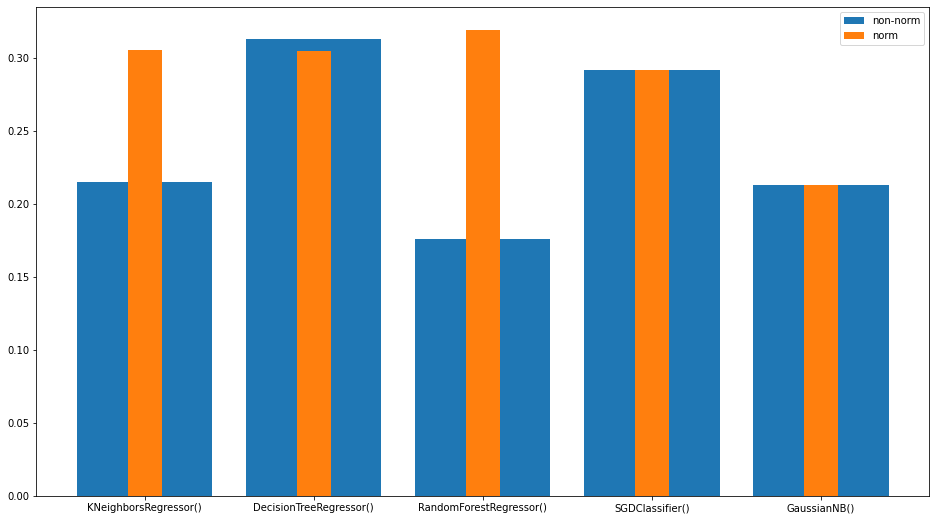

In [13]:
# Pentru a vedea mai bine erorile folosesc matplotlib pentru a crea un grafic 
plt.figure(figsize=(16, 9))
plt.bar(mse.keys(), mse.values(), label='non-norm')
plt.bar(mse_normalized.keys(), mse_normalized.values(), width=0.2, label='norm')
plt.legend()

In [14]:
# In acesta figura se observa foarte bine ca cel mai bun model este GaussianNB dupa mse

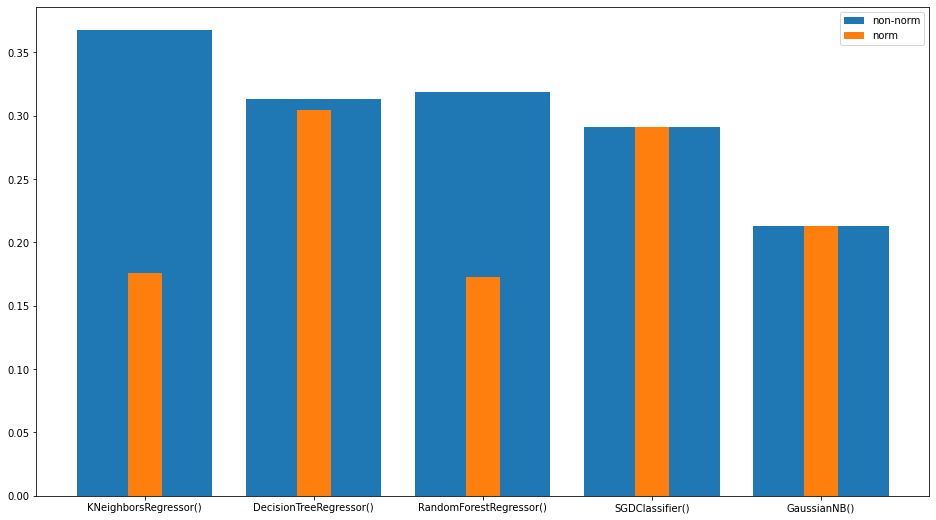

In [15]:
# Sa vad diferenta erorilor dupa mae
plt.figure(figsize=(16, 9))
plt.bar(mae.keys(), mae.values(), label='non-norm')
plt.bar(mae_normalized.keys(), mae_normalized.values(), width=0.2, label='norm')
plt.legend()

In [16]:
# Putem observa cu ochiul liber ca si aici cel mai bun model de ML este GaussianNB

In [17]:
# Importez Pipeline, modelul care permite sa uneasca cateva etape pana la predictie
from sklearn.pipeline import Pipeline

In [18]:
# Creez Pipeline, cu cel mai bun model de ML, care am observat ca este GaussianNB
pipe = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('naive_bayes', GaussianNB())
    ]
)

In [19]:
x = df.drop(['HeartDisease'], axis=1).values
y = df['HeartDisease'].values

In [20]:
# Obtin modelul Pipeline
pipe.fit(x, y)

Pipeline(steps=[('scaler', StandardScaler()), ('naive_bayes', GaussianNB())])

In [21]:
# Importez biblioteca care imi permite sa stochez local modelul creat
import pickle

In [22]:
# Salvez modelul in calculator
pickle.dump(pipe, open('pipe.pkl', 'wb'))